# Final Articles

There are 20 articles and 21 conference papers that made it into the review.

In [2]:
import pandas as pd
import numpy as np
import itertools
from collections import defaultdict


In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
plt.style.use('presentation.mplstyle')
mpl.matplotlib_fname()

'/Users/kylehamilton/MyDocuments/ML-Labs/neuro-symbolic-AI/neuro-symbolic-ai-systematic-review/Working-Files/matplotlibrc'

In [140]:
df=pd.read_csv('Data/NeSy-Review-Papers - 5.31.22.csv')
# df.drop(df[df.eliminate == 1].index, inplace=True)

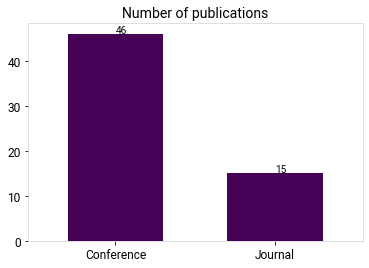

In [141]:
fig, ax = plt.subplots()
docType = pd.value_counts(df['Doc type'].values, sort=True)

df['Doc type'].value_counts().plot(kind='bar', width= 0.6, title="Number of publications")

type_of_publication = ["Conference", "Journal"]

ax.set_xticklabels(type_of_publication, minor=False, rotation=0) 

for index,data in enumerate(docType.values):
    ax.text(x=index , y = data+0.2 , s=f"{data}")
    
plt.savefig('doctype.jpg',  bbox_inches='tight')

In [142]:
list(df['Doc type'].value_counts())

[46, 15]

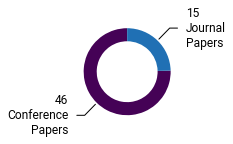

In [143]:
fig, ax = plt.subplots(figsize=(5, 2), subplot_kw=dict(aspect="equal"))

data = list(df['Doc type'].value_counts())
recipe = [str(data[0])+"\nConference\nPapers",str(data[1])+"\nJournal\nPapers"]



wedges, texts = ax.pie(data, wedgeprops=dict(width=0.3), startangle=90)

bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="w", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment,fontsize=12, **kw)

# ax.set_title("Number of publications")

plt.savefig("images/num_pub.svg", format="svg",  bbox_inches='tight')

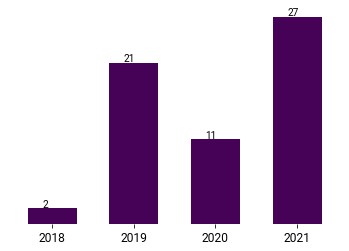

In [144]:
fig, ax = plt.subplots()
yearpublished = pd.value_counts(df['Year'].values).sort_index()

#, title="Number of articles published per year
yearpublished.plot(kind='bar', width= 0.6)
plt.box(False)
ax.set_yticks([])
plt.xticks(rotation=0) 

for index,data in enumerate(yearpublished.values):
    ax.text(x=index-0.12 , y = data+0.2 , s=f"{data}")
    
plt.savefig('images/pub_year.svg', format="svg",  bbox_inches='tight')

In [145]:
df['Business Use Case'].value_counts()

Question answering                 10
Text classification                 7
Sentiment analysis                  5
Reading comprehension               5
KG Completion / link prediction     5
Information extraction              3
Causal Reasoning                    3
Annotation                          3
Decision support                    2
Language modeling                   2
Relation extraction                 2
Dialog system                       2
N2F                                 2
Text games                          2
Translation                         1
Entity Resolution                   1
Image captioning                    1
Entity Linking                      1
Argumentation mining                1
Emotion recognition                 1
Text summarization                  1
Opnion extraction                   1
Name: Business Use Case, dtype: int64

In [146]:
use_case_count = df['Business Use Case'].value_counts()
# use_case_count['KG Completion / link prediction']+=use_case_count['Text classification\nKG Completion / link prediction']
# use_case_count['Text classification']+=use_case_count['Text classification\nKG Completion / link prediction']
# use_case_count['Question answering']+=use_case_count['Question answering,\ninformation extraction']
# use_case_count['Information extraction']+=use_case_count['Question answering,\ninformation extraction']
# use_case_count.pop('Text classification\nKG Completion / link prediction')
# use_case_count.pop('Question answering,\ninformation extraction')

use_case_count = use_case_count.sort_values(ascending=False)


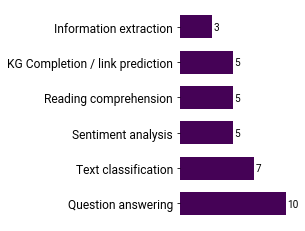

In [147]:
fig, ax = plt.subplots(figsize=(2,4))
plt.box(False)
plt.xticks([])

# plt.subplot(1, 2, 1) # row 1, col 2 index 1


use_case_count[:6].plot(kind='barh',width=.65)

for i, v in enumerate(use_case_count[:6].values):
    ax.text(v+0.1, i-.1 , str(v))

    

plt.savefig('images/biz_use_case.svg',  format="svg",  bbox_inches='tight')

In [148]:
df['Technical Application'].value_counts()

classification                35
reasoning                     10
generative                     7
information extraction         7
classification,\nreasoning     1
similarity                     1
Name: Technical Application, dtype: int64

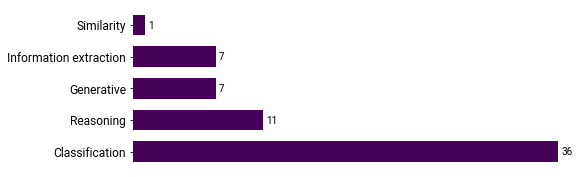

In [151]:
fig, ax = plt.subplots(figsize=(8,3))

app_value_counts = df['Technical Application'].value_counts()
app_value_counts['reasoning']+=app_value_counts['classification,\nreasoning']
app_value_counts['classification']+=app_value_counts['classification,\nreasoning']
app_value_counts.pop('classification,\nreasoning')

avc = pd.Series(dtype='float64')
for k in app_value_counts.keys():
    avc[k.capitalize()] = app_value_counts[k]

avc.plot(kind='barh', width=.65)
plt.box(False)
plt.xticks([])
for i, v in enumerate(avc.values):
    ax.text(v+0.3, i-.1 , str(v))
    
plt.savefig('images/techApplication.svg',  format="svg",   bbox_inches='tight')

###Not used 
plt.hist(df['Year'],rwidth=0.9)
plt.title('Publication Year Distribution')
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.show()

/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]


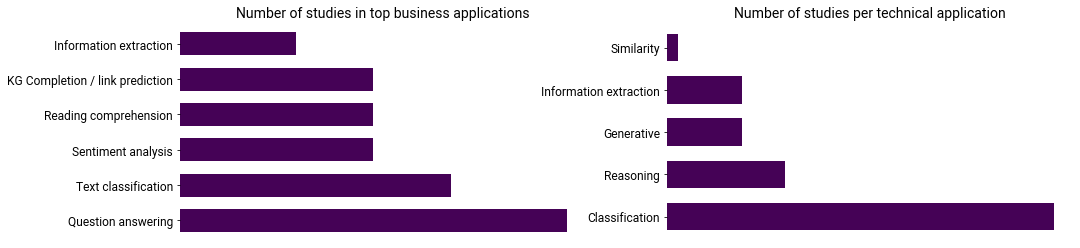

In [152]:
fig, ax = plt.subplots(figsize=(16,4))


plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.box(False)
plt.xticks([])
use_case_count[:6].plot(kind='barh',width=.65,title = "Number of studies in top business applications")

for i, v in enumerate(use_case_count[:6].values):
    ax.text(v+0.1, i-.1 , str(v))

plt.subplot(1, 2, 2) # index 2   
avc = pd.Series()
for k in app_value_counts.keys():
    avc[k.capitalize()] = app_value_counts[k]
avc.plot(kind='barh', width=.65,title="Number of studies per technical application")
plt.box(False)
plt.xticks([])
for i, v in enumerate(avc.values):
    ax.text(v+0.3, i-.1 , str(v))


plt.savefig('images/combined.svg',  format="svg",  bbox_inches='tight')

In [156]:
df['Type of Learning'].value_counts()

supervised                   45
unsupervised                  6
semi-supervised               6
reinforcement                 3
curriculum,\nunsupervised     1
Name: Type of Learning, dtype: int64

In [160]:
type_of_learning = df['Type of Learning'].value_counts()
type_of_learning['unsupervised']+=type_of_learning['curriculum,\nunsupervised']
type_of_learning['curriculum']=0
type_of_learning['curriculum']+=type_of_learning['curriculum,\nunsupervised']
type_of_learning.pop('curriculum,\nunsupervised')

1

/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


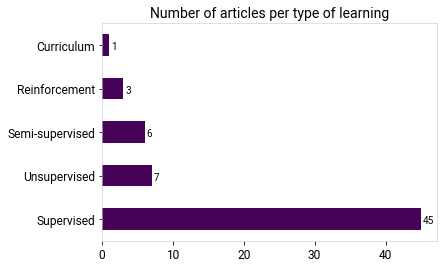

In [161]:
fig, ax = plt.subplots()
# type_of_learning = df['Type of Learning'].value_counts()

tol = pd.Series()

for k in type_of_learning.keys():
    tol[k.capitalize()] = type_of_learning[k]

tol.plot(kind='barh', title="Number of articles per type of learning")

for i, v in enumerate(tol.values):
    ax.text(v+0.3, i-.1 , str(v))
    
plt.savefig('typeoflearning.svg',  format="svg",  bbox_inches='tight')

/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


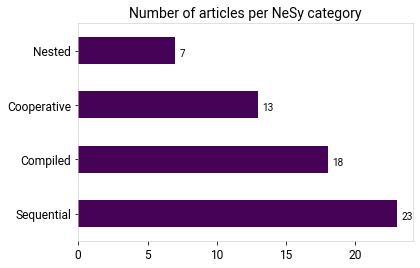

In [165]:
fig, ax = plt.subplots()
nesy_value_counts = df['NeSy Category'].value_counts()

nvc = pd.Series()

for k in nesy_value_counts.keys():
    nvc[k.capitalize()] = nesy_value_counts[k]

nvc.plot(kind='barh', title="Number of articles per NeSy category")


for i, v in enumerate(nvc.values):
    ax.text(v+0.3, i-.1 , str(v))
    

    
plt.savefig('nesy category.svg',  format="svg",  bbox_inches='tight')

/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 8594 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8594 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8594 missing from current font.
  font.set_text(s, 0, flags=flags)


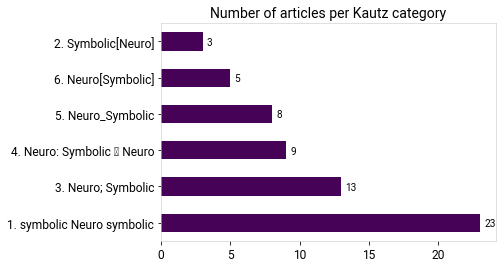

In [166]:
fig, ax = plt.subplots()

kautzCount = pd.value_counts(df['Kautz category'].values, sort=True)

df['Kautz category'].value_counts().plot(kind='barh', title="Number of articles per Kautz category")
for i, v in enumerate(kautzCount.values):
    ax.text(v+0.3, i-.1 , str(v))
    
plt.savefig('Kautz category.svg',  format="svg",   bbox_inches='tight')

In [111]:
#df['Technical Application'].value_counts().plot(kind='barh', title="Number of articles per technical application")#

In [112]:
#nesy_value_counts['compiled']+=nesy_value_counts['compiled']
#nesy_value_counts.pop('compiled')
#nesy_value_counts['cooperative']+=nesy_value_counts['cooperative']
#nesy_value_counts['sequential']+=nesy_value_counts['sequential']
#nesy_value_counts['nested']+=nesy_value_counts['nested']

In [167]:
df['Symbolic terms'].unique()

array(['first order logic (FOL),\nGrounding,\nfactor graph',
       'dependency parsing', 'semantic parsing',
       'first order logic (FOL),\nontology', 'case based reasoning (CBR)',
       'temporal logic', 'knowledge graph (KG)', 'graph representation',
       'rule induction',
       'first order logic (FOL),\nontology,\nsemantic parsing,\nrule based',
       'Natural Logic', 'first order logic (FOL)',
       'knowledge graph (KG),\nontology',
       'ontology,\nfirst order logic (FOL)', 'semantic net',
       'first order logic (FOL),\nknowledge graph (KG)',
       'semantic enrichement',
       'dependency parsing,\nconstituency parsing',
       'dependency parsing,\ngraph reasoning,\ngraph representation',
       'Vector-symbolic architecture',
       'semantic enrichement,\ninductive logic prgramming (ILP),\nfirst order logic (FOL),\nontology',
       'rule based', 'fuzzy logic', 'path finding and reasoning',
       'semantic enrichment', 'sememe',
       'symbolic learner,\ns

In [168]:
df['Neural terms'].unique()

array(['long short term memory (LSTM),\nTransE,\ntransformer,\nrecurrent neural network (RNN)',
       'transformer', 'graph neural network (GNN)',
       'recurrent neural network (RNN),\nBiDAF',
       'Gated Neural Network,\nrecurrent neural network (RNN)',
       'recurrent neural network (RNN),\ntransformer',
       'convolutional neural network (CNN)', 'Logical Neural Network',
       'TransE,\ntransformer', 'Logical Neural Network,\ntransformer',
       'recurrent neural network (RNN)',
       'graph neural network (GNN),\ntransformer', 'SVM',
       'neural network (NN)', 'logic tensor network (LTN)',
       'SVM,\nneuroevolution (NE)',
       'recursive neural knowledge network (RNKN),\nrecursive neural network (RcNN)',
       'reinforcement learning (RL),\nMemory Network,\nneural network (NN)\n',
       'convolutional neural network (CNN),\nrecurrent neural network (RNN),\ndeep belief network (DBN)',
       'convolutional neural network (CNN),\nrecurrent neural network (RNN)'

In [198]:
df['Study Quality']

0     1.000000
1     0.666667
2     0.722222
3     0.555556
4     0.444444
        ...   
56    0.780000
57    0.560000
58    0.780000
59    0.780000
60    0.670000
Name: Study Quality, Length: 61, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


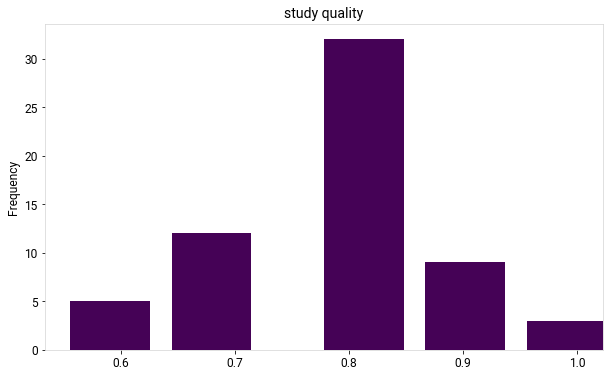

In [229]:
fig, ax = plt.subplots(figsize=(10,6))

qq['AVG'].plot(kind='hist', width=.07, title="study quality")

#ind = np.arange(len(docType.index))

#fig.suptitle('Document type', fontsize=18)
#plt.xlabel('Count', fontsize=14)
#plt.ylabel('Document', fontsize=14)
# for i, v in enumerate(nvc.values):
#     ax.text(v+0.3, i-.1 , str(v))
print(ax)
# plt.savefig('study quality.jpg',  bbox_inches='tight')

In [171]:
# df['Study Quality'].str.rstrip('%').astype('float').describe()

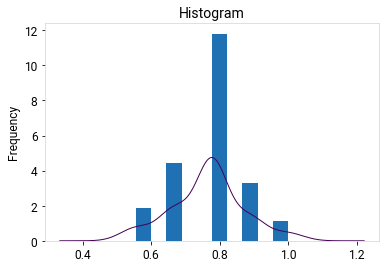

In [230]:
fig, ax = plt.subplots()
qq['AVG'].plot.kde(ax=ax, legend=False, title='Histogram')
qq['AVG'].plot.hist(density=True, ax=ax)
plt.savefig('qq-histogram.svg',  format="svg",   bbox_inches='tight')

In [231]:
qq=pd.read_csv('Data/NeSy-Review-Papers - QQ.csv')
# qq.drop(qq[qq.eleiminate == 1].index, inplace=True)

In [232]:
qq.columns

Index(['KEY', 'Title', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'AVG', 'notes', 'questions'],
      dtype='object')

In [233]:
qqs=qq[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
       'Q8', 'Q9']]

In [234]:
qqs=qqs[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].apply(pd.to_numeric)

In [235]:
qqs['sum'] = qqs['Q1']+ qqs['Q2']+qqs['Q3']+qqs['Q4']+qqs['Q5']+qqs['Q6']

In [236]:
qqs[qqs['sum']<6]

,Q1,Q2,Q3,Q4,Q5,Q6,sum
8,1,1,0,0,1,0,3
9,1,1,1,1,1,0,5
10,0,1,0,1,1,1,4
14,1,1,1,0,1,1,5
33,1,0,1,1,1,1,5
34,1,1,1,1,1,0,5
50,1,1,0,1,1,1,5
55,1,1,0,1,1,1,5
56,1,1,0,1,1,1,5


In [237]:
# positively answer Q1-Q6
len(qqs[qqs['sum']>=6])/len(qqs)

0.8524590163934426

In [238]:
# do not provide source code
1 - sum(qq['Q8'])/len(qqs)

0.8032786885245902

In [239]:
sum(qq['AVG'])/len(qq)

0.7650273224278684

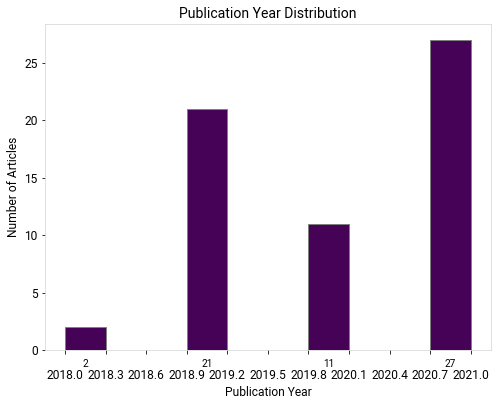

In [243]:
###Additional plots 
fig, ax = plt.subplots(figsize=(8,6))

counts, bins, patches = ax.hist(df['Year'], edgecolor='gray')

plt.title('Publication Year Distribution')
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Change the colors of bars at the edges...
twentyfifth, seventyfifth = np.percentile(df['Year'], [25, 75])

# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    if(count):
        ax.annotate(int(count), xy=(x, 0.03), xycoords=('data', 'axes fraction'), xytext=(0, -18), textcoords='offset points', va='top', ha='center')

ax.tick_params(axis='x', which='major', pad=15)

    # Label the percentages
   # percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    #ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
     #   xytext=(0, -32), textcoords='offset points', va='top', ha='center')

In [127]:
df['Datasets'].value_counts()

Private                                                                                                                                                                               3
DBpedia                                                                                                                                                                               2
SICK                                                                                                                                                                                  1
bAbI-20                                                                                                                                                                               1
Pang and Lee,\nAffectNet benchmark                                                                                                                                                    1
FB15K, WN18                                                                     

In [128]:
# symbolic terms
sym_terms=df['Symbolic terms']
sym_list=[[i.rstrip(',') for i in str(s).split("\n")] for s in sym_terms]

In [129]:
neu_terms=df['Neural terms']
neu_list=[[i.rstrip(',') for i in str(s).split("\n")] for s in neu_terms]

In [130]:
sym_set=set(sum(sym_list,[]))

In [131]:
neu_set=set(sum(neu_list,[]))

In [132]:
neu_terms

0     long short term memory (LSTM),\nTransE,\ntrans...
1                                           transformer
2                            graph neural network (GNN)
3                recurrent neural network (RNN),\nBiDAF
4     Gated Neural Network,\nrecurrent neural networ...
                            ...                        
56    recursive neural network (RcNN),\nTensor Produ...
57    recurrent neural network (RNN),\nconvolutional...
58                           graph neural network (GNN)
59    Tensor Product Representation (TPR),\nrecurren...
60                       recurrent neural network (RNN)
Name: Neural terms, Length: 61, dtype: object

In [133]:
neu_set

{'',
 'BiDAF',
 'Gated Neural Network',
 'Logical Neural Network',
 'Memory Network',
 'SVM',
 'Tensor Product Representation (TPR)',
 'TransE',
 'attention network (Attn)',
 'convolutional neural network (CNN)',
 'deep belief network (DBN)',
 'graph neural network (GNN)',
 'logic tensor network (LTN)',
 'long short term memory (LSTM)',
 'neural network (NN)',
 'neuroevolution (NE)',
 'recurrent neural network (RNN)',
 'recursive neural knowledge network (RNKN)',
 'recursive neural network (RcNN)',
 'reinforcement learning (RL)',
 'transformer'}

In [134]:
sym_set

{'ConceptNet KG',
 'Grounding',
 'Huffman tree',
 'Natural Logic',
 'Neutrosophy',
 'Sequencial decision making',
 'Vector-symbolic architecture',
 'binding problem',
 'case based reasoning (CBR)',
 'cognitive linguistics',
 'commonsense knowledge',
 'constituency parsing',
 'dependency parsing',
 'domain specific language (DSL)',
 'factor graph',
 'first order logic (FOL)',
 'fuzzy logic',
 'fuzzy neural network (FNN)',
 'fuzzy rules',
 'graph reasoning',
 'graph representation',
 'inductive logic prgramming (ILP)',
 'knowledge graph (KG)',
 'logic',
 'logical connectives',
 'mamdani fuzzy system (MFS)',
 'ontology',
 'path finding and reasoning',
 'predicate logic',
 'program synthesis',
 'relational logic',
 'rule based',
 'rule induction',
 'semantic enrichement',
 'semantic enrichment',
 'semantic net',
 'semantic parsing',
 'sememe',
 'symbolic learner',
 'symbolic node embedding',
 'symbolic processing',
 'symbolic representations',
 'temporal logic',
 'transductive learning'}

In [135]:
tup_dict=defaultdict(int)
for i in range(len(sym_list)):
    lists = list(itertools.product(sym_list[i],neu_list[i]))
    
    for j in lists:
        tup_dict[j]+=1


In [136]:
tup_dict

defaultdict(int,
            {('first order logic (FOL)', 'long short term memory (LSTM)'): 1,
             ('first order logic (FOL)', 'TransE'): 1,
             ('first order logic (FOL)', 'transformer'): 5,
             ('first order logic (FOL)', 'recurrent neural network (RNN)'): 4,
             ('Grounding', 'long short term memory (LSTM)'): 1,
             ('Grounding', 'TransE'): 1,
             ('Grounding', 'transformer'): 1,
             ('Grounding', 'recurrent neural network (RNN)'): 1,
             ('factor graph', 'long short term memory (LSTM)'): 1,
             ('factor graph', 'TransE'): 1,
             ('factor graph', 'transformer'): 1,
             ('factor graph', 'recurrent neural network (RNN)'): 1,
             ('dependency parsing', 'transformer'): 3,
             ('semantic parsing', 'graph neural network (GNN)'): 2,
             ('first order logic (FOL)', 'BiDAF'): 1,
             ('ontology', 'recurrent neural network (RNN)'): 3,
             ('ontology', 

In [137]:
d=defaultdict(dict)

for i in sym_set:
    inner_dict=defaultdict(dict)
    for j in neu_set:
        inner_dict[j]=tup_dict[(i,j)]
    d[i]=inner_dict
    
assd=pd.DataFrame(d)

In [138]:
assd

,logic,inductive logic prgramming (ILP),symbolic representations,rule based,logical connectives,first order logic (FOL),Neutrosophy,domain specific language (DSL),program synthesis,Natural Logic,...,ontology,path finding and reasoning,symbolic processing,sememe,semantic enrichement,fuzzy neural network (FNN),semantic net,dependency parsing,graph representation,symbolic node embedding
,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TransE,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
recursive neural knowledge network (RNKN),0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
neural network (NN),0,1,0,2,0,1,1,1,1,0,...,1,0,0,1,1,0,0,0,0,0
convolutional neural network (CNN),0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
reinforcement learning (RL),0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
recursive neural network (RcNN),0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
long short term memory (LSTM),0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
neuroevolution (NE),0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
transformer,0,0,0,0,0,5,0,0,0,1,...,2,0,1,0,0,0,1,3,1,0


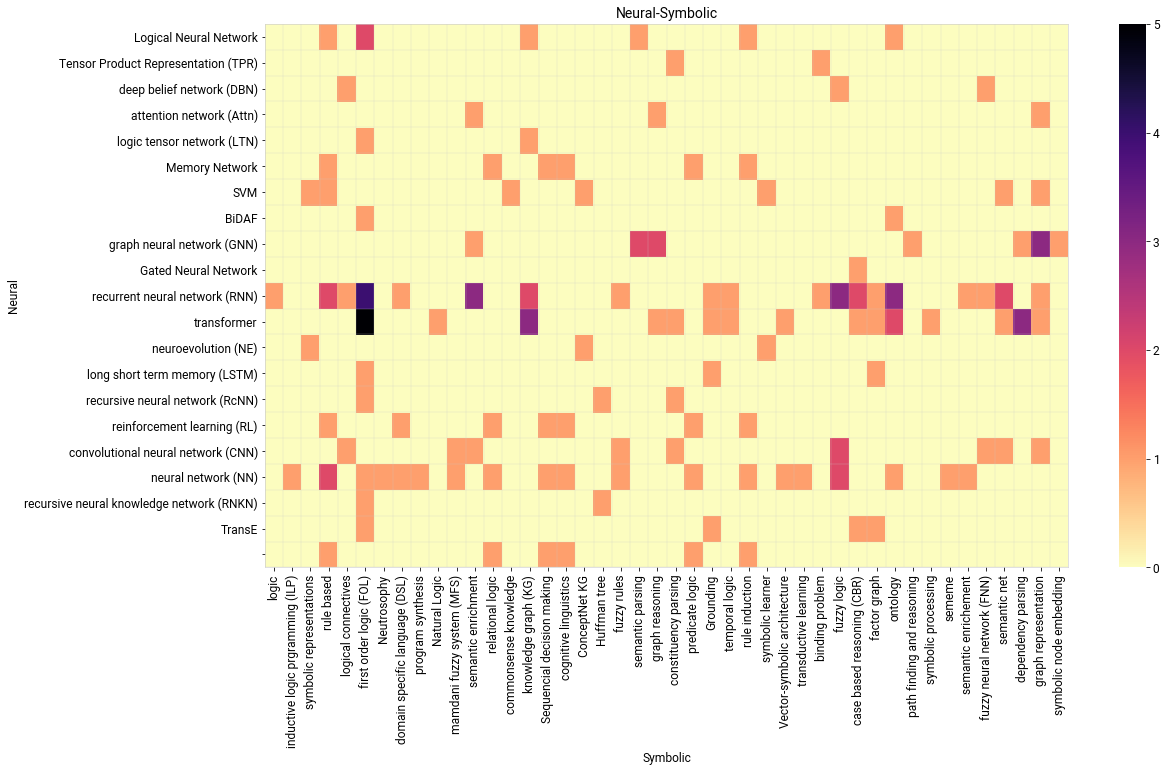

In [139]:
plt.style.use('presentation.mplstyle')
mpl.matplotlib_fname()
fig, ax = plt.subplots(figsize=(18, 10))
color_map = plt.cm.get_cmap('magma')
reversed_color_map = color_map.reversed()

plt.hlines(y=np.arange(0, len(assd.index), 1), xmin=np.full(len(assd.index),0), xmax=np.full(len(assd.index),len(assd.columns)), color="#cccccc", linewidth=.25)
plt.vlines(x=np.arange(0, len(assd.columns), 1), ymin=np.full(len(assd.columns),0), ymax=np.full(len(assd.columns),len(assd.index)), color="#cccccc",linewidth=.25)
plt.yticks(np.arange(0.5, len(assd.index), 1), assd.index)
plt.xticks(np.arange(0.5, len(assd.columns), 1), assd.columns, rotation=90)
plt.ylabel("Neural")
plt.xlabel("Symbolic")
plt.title("Neural-Symbolic")

graph=plt.pcolor(assd, cmap=reversed_color_map)
cb = fig.colorbar(graph)
# cb.set_label('Support', rotation=0, va='bottom')
cb.outline.set_visible(False)
plt.show()

The two studies missing a DOI:
* 2-s2.0-85106687657
* 2-s2.0-85105153943

Scopus search which makes references(25)scopus.csv:
<pre>
DOI ("10.1007/978-3-030-48279-4_55" OR "10.1016/j.neunet.2016.09.001"  OR  "10.1108/IJWIS-11-2020-0067"  OR  "10.1007/s10994-021-05968-x"  OR 
"10.1016/j.eswa.2016.01.007"  OR "10.1016/j.neucom.2020.12.040"  OR  "10.1007/s10462-010-9188-4"  OR  "10.1016/j.patrec.2019.04.024"  OR  
"10.1016/j.neucom.2021.02.021"  OR "10.1109/ACCESS.2020.2972751"  OR  "10.1016/j.neunet.2018.06.012"  OR  "10.1016/j.artmed.2019.101772"  OR 
"10.1007/978-3-030-61609-0_51"  OR "10.1109/ACCESS.2019.2948081"  OR  "10.1109/TASLP.2021.3082295"  OR  "10.1109/ACCESS.2020.3019586"  OR  
"10.1016/j.artint.2015.08.011"  OR "10.1007/978-3-030-82147-0_34"  OR  "10.1016/j.neucom.2017.10.010"  OR  "10.1109/ACCESS.2021.3053917"  OR
"10.1007/s13218-019-00601-5"  OR "10.1007/s12065-019-00301-x"  OR  "10.1145/3453483.3454047" OR "10.1016/j.neunet.2012.02.013" OR
"10.1007/s11042-019-08125-8")  

OR  EID ( "2-s2.0-85106687657"  OR  "2-s2.0-85105153943" ) 
</pre>